In [25]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# File to Load
ride_data_to_load = "Resources/ride_data.csv"
city_data_to_load = "Resources/city_data.csv"

# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on='city')

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [26]:
# Obtain city types
city_types = combined_data['type'].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [27]:
# Group data by city type and city name
grouped_data = combined_data.groupby(['type', 'city'])

In [28]:
# Set x coordinates equal to the total number of rides per city for each city type
x = grouped_data['ride_id'].count()

urban_x = x['Urban']
sub_x = x['Suburban']
rural_x = x['Rural']

In [29]:
# Set y coordinates equal to the average fare per city for each city type
y = grouped_data['fare'].mean()

urban_y = y['Urban']
sub_y = y['Suburban']
rural_y = y['Rural']

In [30]:
# Set plot point sizes equal to the driver count per city
s = grouped_data['driver_count'].mean()

urban_s = s['Urban']*20
sub_s = s['Suburban']*20
rural_s = s['Rural']*20

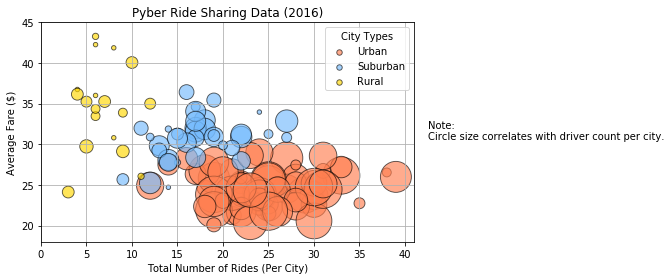

In [49]:
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=urban_s, c='coral', alpha=0.65, linewidths=.9, edgecolors='k', label='Urban')
plt.scatter(sub_x, sub_y, s=sub_s, c='xkcd:sky blue', alpha=0.65, linewidths=.9, edgecolors='k', label='Suburban')
plt.scatter(rural_x, rural_y, s=rural_s, c='gold', alpha=0.65, linewidths=.9, edgecolors='k', label='Rural')

# Plot elements
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.xlim(0, 41)
plt.ylim(18, 45)

# Format legend
legend = plt.legend(title='City Types', loc='best', markerscale=.3, scatterpoints=1, fontsize=10)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]  

# Add note
plt.gcf().text(1, .5, 'Note: \nCircle size correlates with driver count per city.', fontsize=10)

# Format
plt.grid()
plt.tight_layout()

# Save Figure
plt.savefig('Images/bubbleplot-rideshare.png')
plt.show()

## Total Fares by City Type

In [38]:
# Set formatting preferences for all pie charts
labels = ['Urban', 'Suburban', 'Rural']
colors = ['xkcd:rose pink', 'xkcd:sky blue', 'gold']
explode = [0.2, 0, 0]

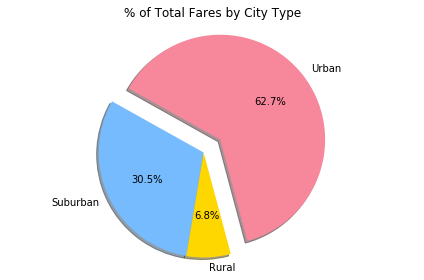

In [39]:
# Obtain total fares by city type
total_fares = grouped_data['fare'].sum()

total_fares_urban = total_fares['Urban'].sum()
total_fares_sub = total_fares['Suburban'].sum()
total_fares_rural = total_fares['Rural'].sum()

sizes = [total_fares_urban, total_fares_sub, total_fares_rural]

# Build pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=285)
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.tight_layout()


# Save Figure
plt.savefig('Images/piechart-pcttotalfare.png')
plt.show()

## Total Rides by City Type

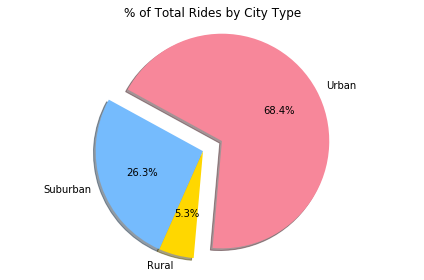

In [40]:
# Obtain total number of rides for each city type
total_rides_type = combined_data['type'].value_counts()
sizes = [total_rides_type[0], total_rides_type[1], total_rides_type[2]]

# Build pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=265)
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig('Images/piechart-pcttotalrides.png')
plt.show()

## Total Drivers by City Type

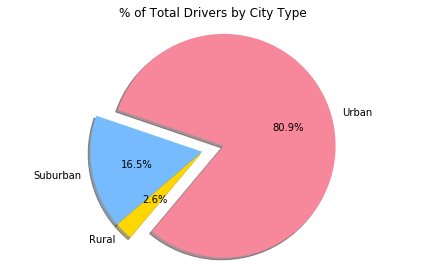

In [41]:
# Obtain total number of drivers for each city type
total_drivers_urban = s['Urban'].sum()
total_drivers_sub = s['Suburban'].sum()
total_drivers_rural = s['Rural'].sum()

sizes = [total_drivers_urban, total_drivers_sub, total_drivers_rural]

# Build Pie Charts
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=230)
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig('Images/piechart-pcttotaldrivers.png')
plt.show()

## Observations

* Though there are fewer total number of rides in rural areas, those rides have a higher average fare that urban and suburban areas.

* Urban areas dominate the majority of the total percent of fares (62.7%), rides (68.4%), and drivers (80.9%).

* There appears to be an inverse relationship between the total number of rides and the average fare.